# Gradient of Image

## import library

In [29]:
#%%
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors

## load input image ('test.jpeg')

In [30]:
I0 = img.imread('test.jpeg')

## check the size of the input image

In [31]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
num_row     = (I0.shape)[0]
num_column  = (I0.shape)[1]
num_channel = (I0.shape)[2]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I0 = ', num_row)
print('number of columns of I0 = ', num_column)
print('number of channels of I0 = ', num_channel)

number of rows of I0 =  510
number of columns of I0 =  512
number of channels of I0 =  3


## convert the color image into a grey image
- take the average of the input image with 3 channels with respect to the channels into an image with 1 channel

In [34]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
R,G,B=I0[:,:,0],I0[:,:,1],I0[:,:,2]
R=np.uint16(R)
G=np.uint16(G)
B=np.uint16(B)
I = (R+G+B)/3
I=np.uint8(I)    
    
num_row     = (I.shape)[0]
num_column  = (I.shape)[1]
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('number of rows of I = ', num_row)
print('number of columns of I = ', num_column)

number of rows of I =  510
number of columns of I =  512


## normalize the converted image
- normalize the converted grey scale image so that its maximum value is 1 and its minimum value is 0

In [35]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

I = (I-np.min(I))/(np.max(I)-np.min(I))

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

print('maximum value of I = ', np.max(I))
print('minimum value of I = ', np.min(I))

maximum value of I =  1.0
minimum value of I =  0.0


## define a function to compute the derivative of input matrix in x(row)-direction

- forward difference : $ I[x+1, y] - I[x, y] $ 

(512, 514)


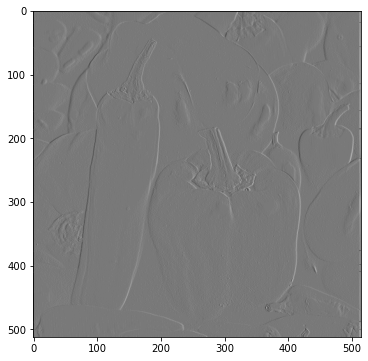

In [67]:
D = np.zeros(I.shape)
padded_image = np.pad(I,
   (1, 1),
   mode='edge',
   )
rolled_image=np.roll(padded_image, 1)
D=(rolled_image-padded_image)
print(D.shape)
plt.figure(figsize=(8,6))
plt.imshow(D, cmap='gray')
plt.show()

In [37]:
def compute_derivative_x_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    padded_image = np.pad(I,
        (1, 1),
        mode='edge',
    )
    rolled_image=np.roll(padded_image, 1)
    

    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- backward difference : $ I[x, y] - I[x-1, y] $ 

In [38]:
def compute_derivative_x_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # filter = np.array([
    #     [-1, 1, 0],
    #     [-1, 1, 0],
    #     [-1, 1, 0]
    # ], dtype=np.float32)/9.0 # Box Filter
    # image_arr = np.array(I)
    # D = convolve(image_arr, filter, padding=(1, 1))
    
    padded_image = np.pad(I,
        (1, 1),
        mode='edge',
    )
    rolled_image=np.roll(padded_image, 1)

    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x+1, y] - I[x-1, y] \right)$ 

In [39]:
def compute_derivative_x_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # dx = np.array([[1, 0, -1],
    #                [1, 0, -1],
    #                [1, 0, -1]], dtype=np.float32)  
    # D=cv2.filter2D(I, -1, dx, delta=128)
    filter = np.array([
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1]
    ], dtype=np.float32)/9.0 # Box Filter
    image_arr = np.array(I)/2
    D = convolve(image_arr, filter, padding=(1, 1)) 
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    return D

## define a function to compute the derivative of input matrix in y(column)-direction

- forward difference : $ I[x, y+1] - I[x, y] $ 

In [40]:
def compute_derivative_y_forward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    filter = np.array([
        [0, 0, 0],
        [-1, -1, -1],
        [1, 1, 1]
    ], dtype=np.float32)/9.0 # Box Filter
    image_arr = np.array(I)
    D = convolve(image_arr, filter, padding=(1, 1))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- backward difference : $ I[x, y] - I[x, y-1] $ 

In [41]:
def compute_derivative_y_backward(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    h,w=D.shape
    filter = np.array([
        [-1, -1, -1],
        [1, 1, 1],
        [0, 0, 0]
    ], dtype=np.float32)/9.0 # Box Filter
    image_arr = np.array(I)
    D = convolve(image_arr, filter, padding=(1, 1))
    
    ##
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

- central difference : $ \frac{1}{2} \left( I[x, y+1] - I[x, y-1] \right)$ 

In [42]:
def compute_derivative_y_central(I):
    
    D = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    # dx = np.array([[1, 1, 1],
    #                [0, 0, 0],
    #                [-1, 0, -1]], dtype=np.float32)  
    # D=cv2.filter2D(I, -1, dx, delta=128)
    filter = np.array([
        [-1, -1, -1],
        [0, 0, 0],
        [1, 1, 1]
    ], dtype=np.float32)/9.0 # Box Filter
    image_arr = np.array(I)/2
    D = convolve(image_arr, filter, padding=(1, 1))
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return D

## compute the norm of the gradient of the input image 

- $L_2^2$-norm of the gradient $ \left( \frac{\partial I}{\partial x}, \frac{\partial I}{\partial y} \right) $ is defined by $ \left( \frac{\partial I}{\partial x} \right)^2 + \left( \frac{\partial I}{\partial y} \right)^2 $

In [43]:
def compute_norm_gradient_central(I):
    
    norm_gradient = np.zeros(I.shape)
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    filter = np.array([
        [-1, -1, -1],
        [0, 0, 0],
        [1, 1, 1]
    ], dtype=np.float32)/9.0 # Box Filter
    image_arr = np.array(I)/255.0
    D = convolve(image_arr, filter, padding=(1, 1))
    norm_gradient=D[0]**2+D[1]**2
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return norm_gradient

In [44]:
norm_gradient = np.zeros(I.shape)
norm_gradient.dtype

dtype('float64')

___

___

## functions for presenting the results

___

___

In [45]:
#%%
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I0)
    plt.show()

In [46]:
def function_result_02():
    
    plt.figure(figsize=(8,6))
    plt.imshow(I, cmap='gray', vmin=0, vmax=1, interpolation='none')
    plt.show()

In [47]:
def function_result_03():

    D = compute_derivative_x_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [48]:
def function_result_04():

    D = compute_derivative_x_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [49]:
def function_result_05():

    D = compute_derivative_x_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [50]:
def function_result_06():

    D = compute_derivative_y_forward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [51]:
def function_result_07():

    D = compute_derivative_y_backward(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [52]:
def function_result_08():

    D = compute_derivative_y_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [53]:
def function_result_09():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    plt.imshow(D, cmap='gray')
    plt.show()

In [54]:
def function_result_10():

    D = compute_norm_gradient_central(I)
    
    plt.figure(figsize=(8,6))
    im = plt.imshow(D, cmap=cm.jet, norm=colors.LogNorm())
    plt.colorbar(im)
    plt.show()

In [55]:
def function_result_11():

    D = compute_derivative_x_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [56]:
def function_result_12():

    D = compute_derivative_x_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)

    print('value3 = ', value3)
    print('value4 = ', value4)

In [57]:
def function_result_13():

    D = compute_derivative_x_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [58]:
def function_result_14():

    D = compute_derivative_y_forward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [59]:
def function_result_15():

    D = compute_derivative_y_backward(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [60]:
def function_result_16():

    D = compute_derivative_y_central(I)

    value1 = D[0, 0]    
    value2 = D[-1, -1]    
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


In [61]:
def function_result_17():

    D = compute_norm_gradient_central(I)
    print(D.shape)
    value1 = D[0, 0]  
    print('value1 = ', value1)  
    value2 = D[-1, -1]
    print('value2 = ', value2)   
    value3 = D[100, 100]    
    value4 = D[200, 200]

    print('value1 = ', value1)
    print('value2 = ', value2)
    print('value3 = ', value3)
    print('value4 = ', value4)


___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


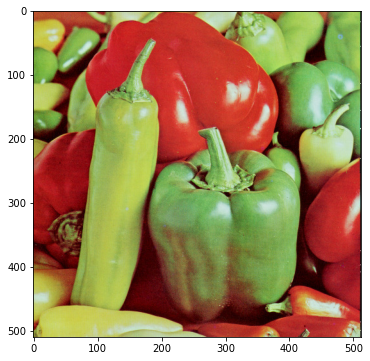

**************************************************
## [RESULT 02]
**************************************************


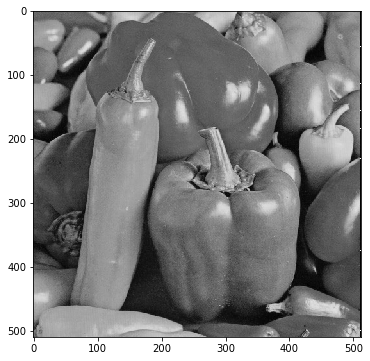

**************************************************
## [RESULT 03]
**************************************************
[[[0.4488189  0.4488189  0.4488189 ]
  [0.4488189  0.4488189  0.4488189 ]
  [0.41338583 0.41338583 0.41338583]
  ...
  [0.51181102 0.51181102 0.51181102]
  [0.01181102 0.01181102 0.01181102]
  [0.01181102 0.01181102 0.01181102]]

 [[0.4488189  0.4488189  0.4488189 ]
  [0.4488189  0.4488189  0.4488189 ]
  [0.41338583 0.41338583 0.41338583]
  ...
  [0.51181102 0.51181102 0.51181102]
  [0.01181102 0.01181102 0.01181102]
  [0.01181102 0.01181102 0.01181102]]

 [[0.44094488 0.44094488 0.44094488]
  [0.44094488 0.44094488 0.44094488]
  [0.44094488 0.44094488 0.44094488]
  ...
  [0.52362205 0.52362205 0.52362205]
  [0.00393701 0.00393701 0.00393701]
  [0.00393701 0.00393701 0.00393701]]

 ...

 [[0.40551181 0.40551181 0.40551181]
  [0.40551181 0.40551181 0.40551181]
  [0.44094488 0.44094488 0.44094488]
  ...
  [0.68503937 0.68503937 0.68503937]
  [0.         0.         0.      

ValueError: could not broadcast input array from shape (3,) into shape (1,)

In [62]:
number_result = 17
for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)